## Task 1

Використовуючи датасет  з файлу Position_Salaries.csv, побудуйте модель поліноміальної регрессії.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import operator

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


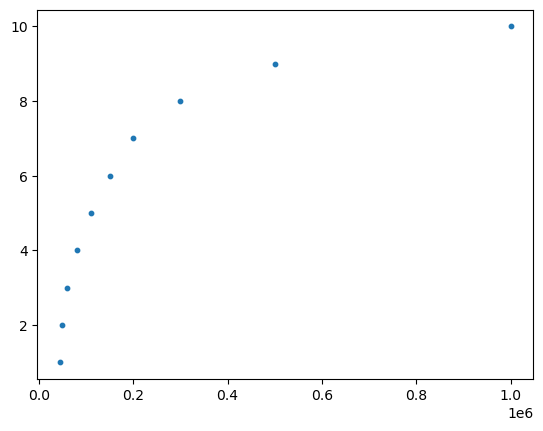

In [3]:
plt.scatter(df['Salary'], df['Level'], s=10)

In [4]:
x = np.array(df['Salary']).reshape(-1, 1)
y = np.array(df['Level']).reshape(-1, 1)
polinomial_features = PolynomialFeatures(degree=3)
x_poly = polinomial_features.fit_transform(x)

In [5]:
x_poly

array([[1.0000e+00, 4.5000e+04, 2.0250e+09, 9.1125e+13],
       [1.0000e+00, 5.0000e+04, 2.5000e+09, 1.2500e+14],
       [1.0000e+00, 6.0000e+04, 3.6000e+09, 2.1600e+14],
       [1.0000e+00, 8.0000e+04, 6.4000e+09, 5.1200e+14],
       [1.0000e+00, 1.1000e+05, 1.2100e+10, 1.3310e+15],
       [1.0000e+00, 1.5000e+05, 2.2500e+10, 3.3750e+15],
       [1.0000e+00, 2.0000e+05, 4.0000e+10, 8.0000e+15],
       [1.0000e+00, 3.0000e+05, 9.0000e+10, 2.7000e+16],
       [1.0000e+00, 5.0000e+05, 2.5000e+11, 1.2500e+17],
       [1.0000e+00, 1.0000e+06, 1.0000e+12, 1.0000e+18]])

In [6]:
model = LinearRegression()
model.fit(x_poly,y)
y_poly_pred = model.predict(x_poly)


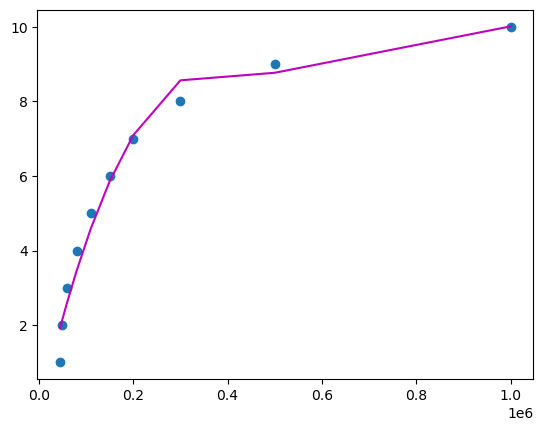

In [7]:
plt.scatter(x,y)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key = sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x,y_poly_pred, color = 'm')
plt.show()
                    

## Task 2

Використовуючи датасет з файлу communities.csv, виконайте нормалізацію даних. Визначте найкращій метод нормалізації для даного набору даниї

In [142]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [59]:
df2 = pd.read_csv('communities.csv', header=None, na_values=['?'])

In [60]:
df2


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [61]:
print(np.shape(df2))

(1994, 128)


In [62]:

print(len(df2)-df2.count())

0         0
1      1174
2      1177
3         0
4         0
       ... 
123    1675
124    1675
125       0
126    1675
127       0
Length: 128, dtype: int64


In [63]:
df2.drop([1, 2, 3, 4], axis=1, inplace=True)
df2.dropna(inplace=True)

In [64]:
df2.isnull().sum().sum()

0

In [65]:
print(np.shape(df2))

(319, 124)


In [105]:
X = df2.drop(127, axis=1)
y = df2[127]

In [107]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [141]:
lr = LinearRegression().fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8760151161610424
0.30112648690355814


In [145]:
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train,y_train)

In [146]:
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.7681644348333336
0.6080614490433844


In [144]:
lasso = LassoCV(n_alphas=100).fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.695734122823955
0.6534824333278877


In [147]:
elastic = ElasticNetCV(cv=5, random_state=0).fit(X_train,y_train)
print(elastic.score(X_train,y_train))
print(elastic.score(X_test,y_test))

0.7066477203090462
0.6523404337859996


для даних, що мають невеликі значення, а це наш випадок, рекомендується використовувати L1 регуляризацію. Так і вишло, що регрессія Лассо гірше навчилась, але найкращще підходить до тестових даних